In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder #, SimpleImputer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Carregando o dataset
# URL do conjunto de dados Titanic
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Importando o conjunto de dados
df = pd.read_csv(url)
df = df.rename(columns={'Survived': 'Target'})
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Selecionando as variáveis
features = [x for x in list(df.columns) if x not in ['Target']] # Exclui a coluna target
target = ['Target']

# Pré-processamento
# Imputação de valores missing
colunas_numericas = list(df.select_dtypes(include=['number']).columns)
colunas_numericas.remove('Target')
imputer = SimpleImputer(strategy='median')

# imputer.fit(df[features])

# Transformação de variáveis categóricas
categorical_features = list(df.select_dtypes(include=['category', 'object']).columns)
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#onehot_encoder.fit(df[categorical_features])

# Pré-processamento em pipeline
preprocessor = ColumnTransformer([
    ('imputer', imputer, colunas_numericas),
    ('onehot', onehot_encoder, categorical_features)
])

# Seleção de features por percentil
selector = SelectPercentile(percentile=90)



# Parâmetros para busca aleatória
param_grid = {
    #'n_estimators': [50],  #np.linspace(100, 500, 5, dtype=int),
    'model__eta': [0.01], #np.linspace(0.01, 0.1, 5),
    'model__max_depth': [3, 5],
    #'gamma': [0, 0.1],
}

# Modelo XGBoost
model = XGBClassifier()

# Pipeline completo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('model', model)
])

# Treino com K-Fold Stratificado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Busca aleatória com validação cruzada
search = RandomizedSearchCV(pipeline, param_grid, cv=cv, n_iter=10, verbose=1)


In [2]:
search.fit(df[features], df[target])

# Resultados
print(f"Melhor score: {search.best_score_}")
print(f"Melhores parâmetros: {search.best_params_}")

/home/david/anaconda3/envs/Analitico_base/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/david/anaconda3/envs/Analitico_base/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/david/anaconda3/envs/Analitico_base/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/david/anaconda3/envs/Analitico_base/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y w

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/home/david/anaconda3/envs/Analitico_base/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/david/anaconda3/envs/Analitico_base/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/david/anaconda3/envs/Analitico_base/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/david/anaconda3/envs/Analitico_base/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversio

Melhor score: 0.8203816458477183
Melhores parâmetros: {'model__max_depth': 5, 'model__eta': 0.01}


In [3]:
#from sklearn.externals import joblib 

# Save the best model
best_model = search.best_estimator_
#joblib.dump(best_model, 'best_xgboost_model.pkl')  # Save as 'best_xgboost_model.pkl'

#print("Best model saved successfully!")


import joblib

# Salvar o modelo
joblib.dump(best_model, 'melhor_modelo_xgboost.joblib')

print("Modelo salvo com sucesso!")

In [5]:

# Carregar o modelo
modelo_carregado = joblib.load('melhor_modelo_xgboost.joblib')

# Fazer previsões
previsoes = modelo_carregado.predict(df[features])

In [6]:
# modelo_carregado[-1].get_booster().get_dump()[0]
modelo_carregado[-1].get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.01}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

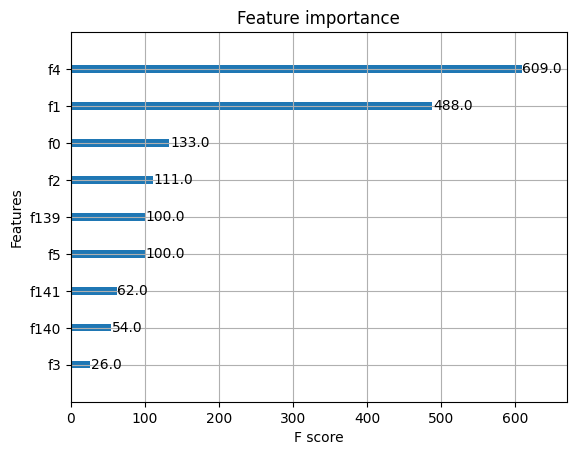

In [7]:

import xgboost as xgb
xgb.plot_importance(modelo_carregado[-1])

In [8]:
#xgb.plot_tree(modelo_carregado[-1], num_trees=6)
# modelo_carregado[-1].feature_importances_
modelo_carregado[-1].n_features_in_

143

In [9]:
nomes_variaveis = modelo_carregado[-1].get_booster().feature_names
nomes_variaveis

In [10]:
import pickle

# Suponha que 'best_model' seja o modelo XGBoost resultante
with open('best_model.pkl', 'wb') as f:
    pickle.dump(modelo_carregado, f)


In [5]:
import pickle

# carregar modelo
with open('best_model.pkl', 'rb') as f:
    modelo_carregado_pkl = pickle.load(f)

In [12]:
# Fazer previsões
previsoes = modelo_carregado_pkl.predict_proba(df[features])

In [13]:
previsoes

array([[0.7924201 , 0.20757991],
       [0.25409365, 0.74590635],
       [0.5296043 , 0.4703957 ],
       ...,
       [0.74817264, 0.2518274 ],
       [0.5100986 , 0.48990145],
       [0.7971367 , 0.20286329]], dtype=float32)

In [14]:

# Generate two normal distributions
prev_0 = previsoes[:, 0]
prev_1 = previsoes[:, 1]
n_bins = 10

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)



# We can set the number of bins with the *bins* keyword argument.
#arg. alpha é para a transparencia
axs[0].hist(prev_0, bins=n_bins, edgecolor='black', alpha=0.7, range=(0, 1))
axs[1].hist(prev_1, bins=n_bins, edgecolor='black', alpha=0.7, range=(0, 1))

# Adicionar nomes das colunas e linhas
axs[0].set_xlabel('Intervalos prev_0')
axs[0].set_ylabel('Frequência')
axs[1].set_xlabel('Intervalos prev_1')
axs[1].set_ylabel('Frequência')

plt.show()

NameError: name 'plt' is not defined

### Curva ROC

AUC: 0.9081370700582665


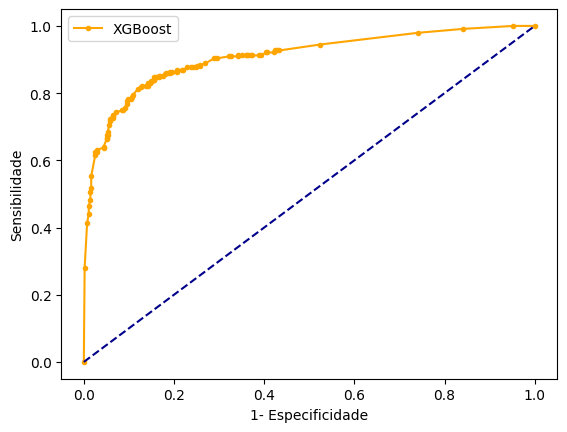

0.9081370700582665

In [21]:
def plot_roc_curve(y_real, probs, modelo):
    '''
    Descrição da função:
    Esta função plota a curva ROC para um modelo de classificação binária.

    Parametros:
    y_real: array 
        Contém os valores reais do target
    probs: array 
        Contém as probabilidades previstas pelo modelo
    modelo: string
        Nome do modelo

    Retorna:
    AUC: float, valor da área sob a curva ROC
    Plot da curva ROC
    '''
    import matplotlib.pyplot as pyplot
    from sklearn.metrics import roc_auc_score, roc_curve

    rfp, rvp, lim = roc_curve(y_real, probs)
    AUC = roc_auc_score(y_real, probs)
    print(f'AUC: {AUC}')
    # Gráfico da curva roc
    pyplot.plot(rfp, rvp, marker='.', label=modelo,color="orange")
    pyplot.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    # alterando o nome dos eixos
    pyplot.xlabel('1- Especificidade')
    pyplot.ylabel('Sensibilidade')
    # Legenda
    pyplot.legend()
    # Mostrando o gráfico
    pyplot.show()
    return AUC



probs = modelo_carregado_pkl.predict_proba(df[features])[:,1]
y_teste= df[target]
auc_metric = plot_roc_curve(y_teste, probs, 'XGBoost')
auc_metric

In [22]:
from sklearn.metrics import classification_report # metricas de validação
print(classification_report(y_teste, modelo_carregado_pkl.predict(df[features])))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       549
           1       0.89      0.66      0.76       342

    accuracy                           0.84       891
   macro avg       0.85      0.81      0.82       891
weighted avg       0.85      0.84      0.83       891



In [ ]:
y_teste, modelo_carregado_pkl.predict(df[features])

### KS Metrica 

In [44]:
#Calcular o KS
import numpy as np
from scipy.stats import ks_2samp

prev_0 = y_teste['Target'].values
prev_1 = modelo_carregado_pkl.predict(df[features])
# Calcular o teste KS entre as duas séries de pontuações
ks_stat, p_value = ks_2samp(prev_0, prev_1)

print("Estatística KS:", ks_stat)
print("Valor de p:", p_value)
#a maior ks stat, maior a diferença entre as duas distribuições

Estatística KS: 0.09764309764309764
Valor de p: 0.0004054290685530275
